In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 1. Load Data

In [2]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
`continent:` There are 25,480 non-null values, 6 unique continents, with "Asia" being the most frequent one, appearing 16,861 times.

`no_of_employees:` The average number of employees is around 5,667, but the standard deviation is quite high (22,877), indicating a large spread. The minimum value is -26 (potentially an error or missing value), while the maximum is 602,069.

`prevailing_wage:` The average wage is 74,455, with a large range from 2 to over 319,000, suggesting significant wage variation.
<li>The large standard deviations in numerical columns indicate the presence of outliers or a wide range of values

In [6]:
df.loc[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [7]:
df.shape

(25480, 12)

In [8]:
# convert the negative values to their absolute values
df['no_of_employees'] = abs(df['no_of_employees'])

#  2. Exploratory Data Analysis

In [9]:
# define numerical & categorical columns
numerical_features = [features for features in df.columns if df[features].dtype !='O']
categorical_features = [features for features in df.columns if df[features].dtype =='O']

print('There are {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('There are {} numerical features: {}'.format(len(categorical_features), categorical_features))

There are 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 numerical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

## 2.1 Univariate Analysis

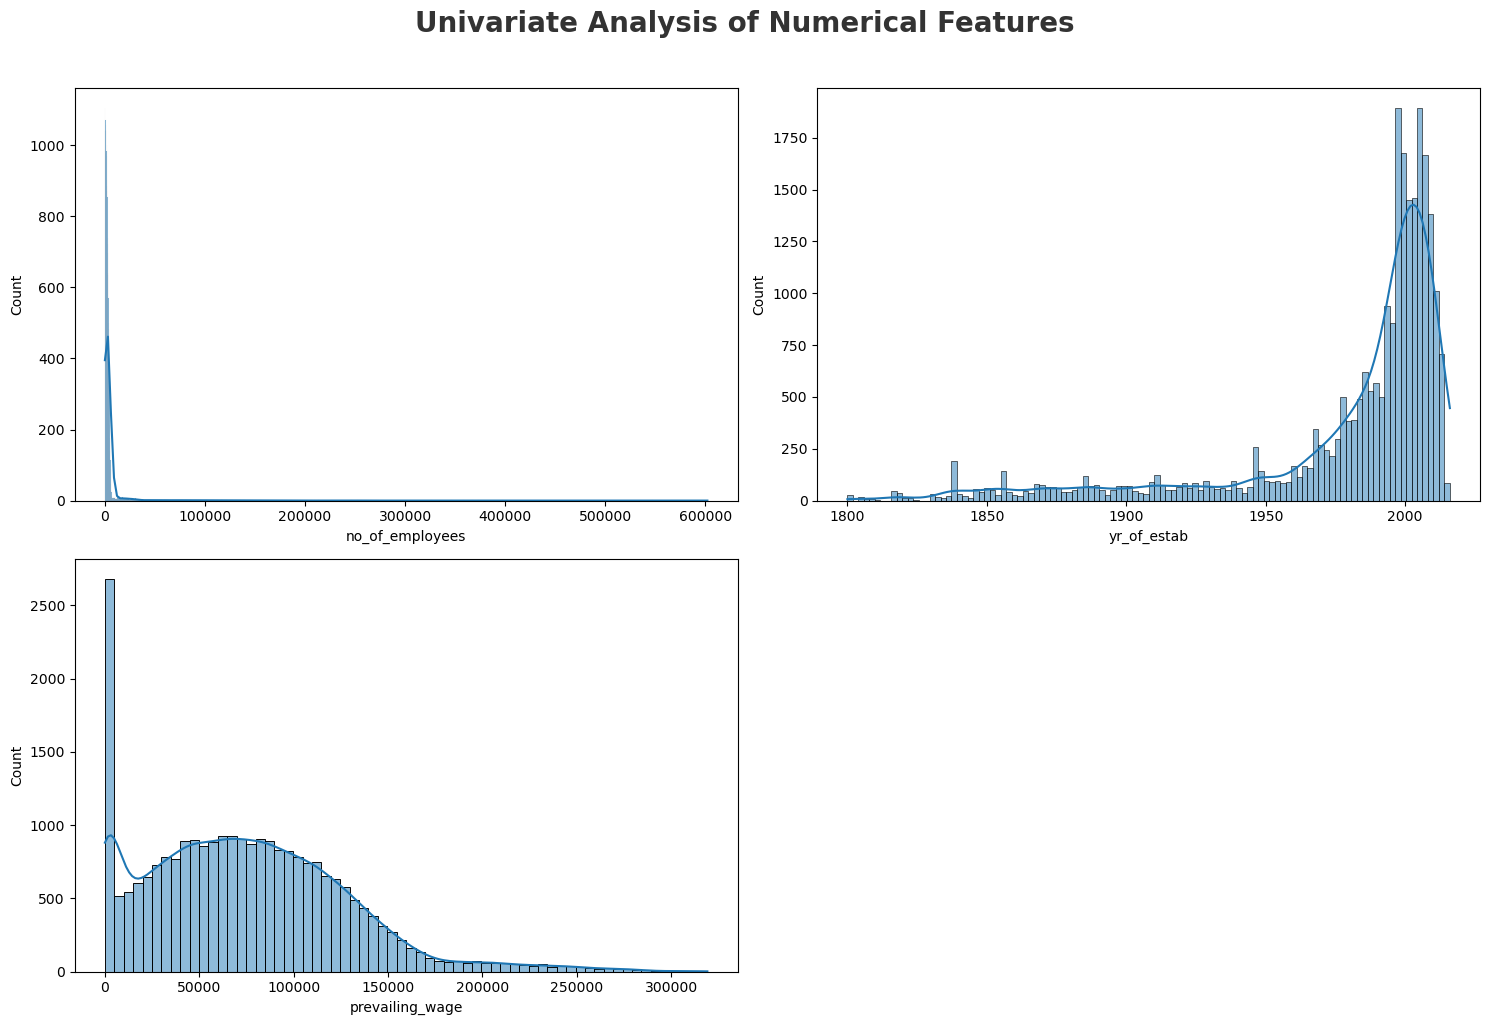

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=df[numerical_features[i]], kde=True)  # kde=True to add a kernel density estimate
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


#### Obervation
`no_of_employees:` column looks more skewed but it may be because of outlies.

`
yr_of_esta:`b is a discrete feature

`
privailing-wa:`ge is a right-skewed distribution.

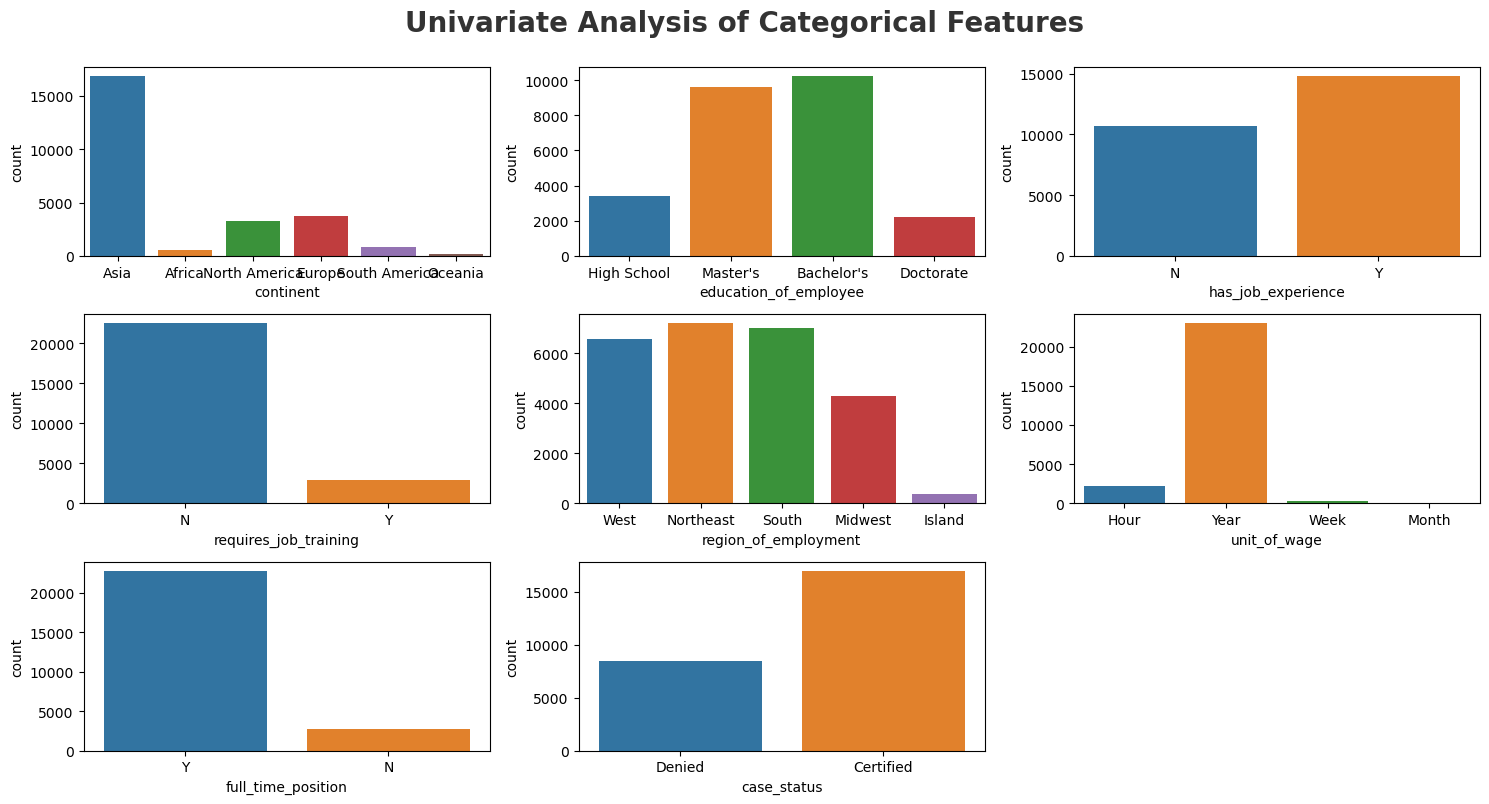

In [12]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#### Observation
`requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.

In rest of the columns are balanced.

## Checking Multicollinearity
In this context, we are using the Chi-Squared test to evaluate the correlation between categorical features and the target column case_status.
<li><b>Null Hypothesis (H₀)</b>: The feature is independent of the target column (no correlation).
<li><b>Alternative Hypothesis (H₁)</b>: The feature is not independent of the target column (correlated).

In [13]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df['case_status'], df[feature])
    
    # Perform the Chi-Square test
    p_value = chi2_contingency(contingency_table)[1]
    
    # Check if p-value is less than 0.05 (significant level)
    if p_value < 0.05:
        chi2_test.append('Reject Null Hypothesis')  # Significant relationship
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')  # No significant relationship
# Create a DataFrame to display the results
result = pd.DataFrame(data={'Column': categorical_features, 'Hypothesis Result': chi2_test})
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [16]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## 2.2 Bivariate Analysis
###  Continues features

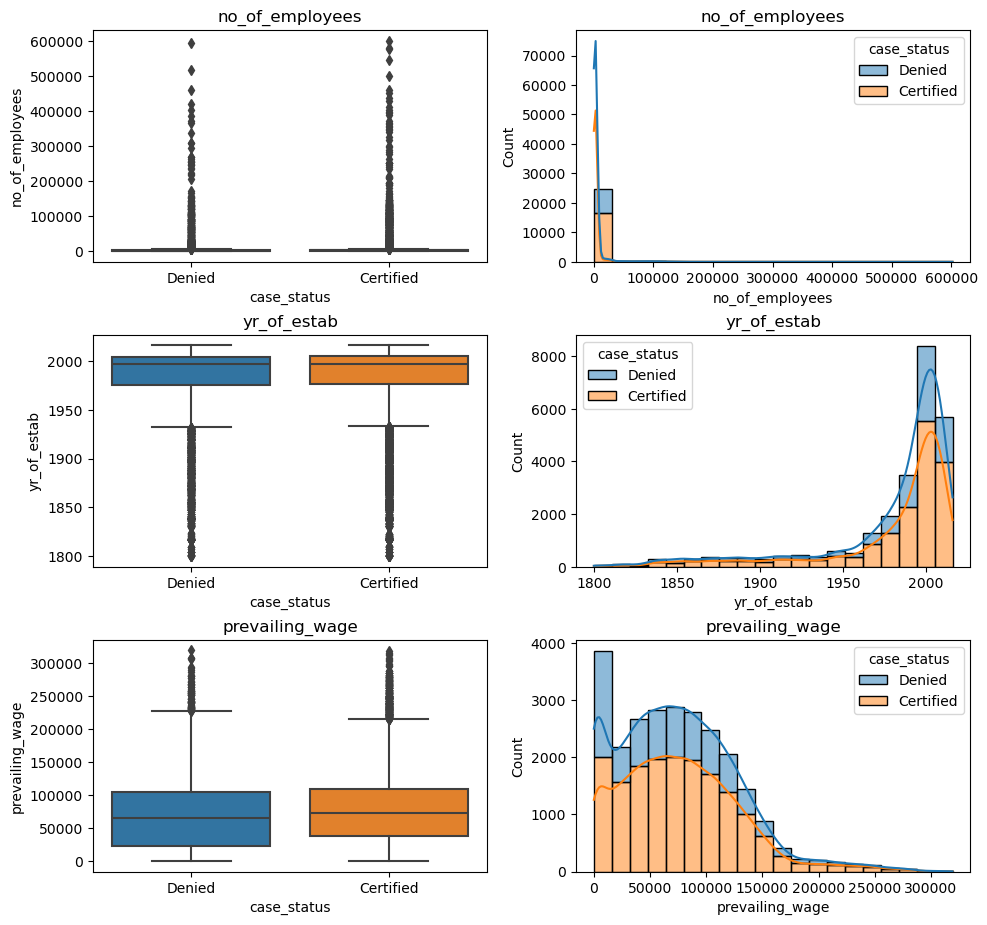

In [17]:
fig , ax = plt.subplots(3,2, figsize=(10,10))
for i, col in enumerate(numerical_features):
    sns.boxplot(data = df, x = 'case_status', y = col, ax=ax[i,0])
    ax[i,0].set_title(f'{col}')
    sns.histplot(data = df, x = col,hue='case_status', bins=20, kde=True, multiple='stack' ,ax=ax[i,1])
    ax[i,1].set_title(f'{col}')

fig.tight_layout()
fig.subplots_adjust(top=0.90)

### Categorical features
### 1. Does applicant Continent has any impact on Visa status ?

In [20]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

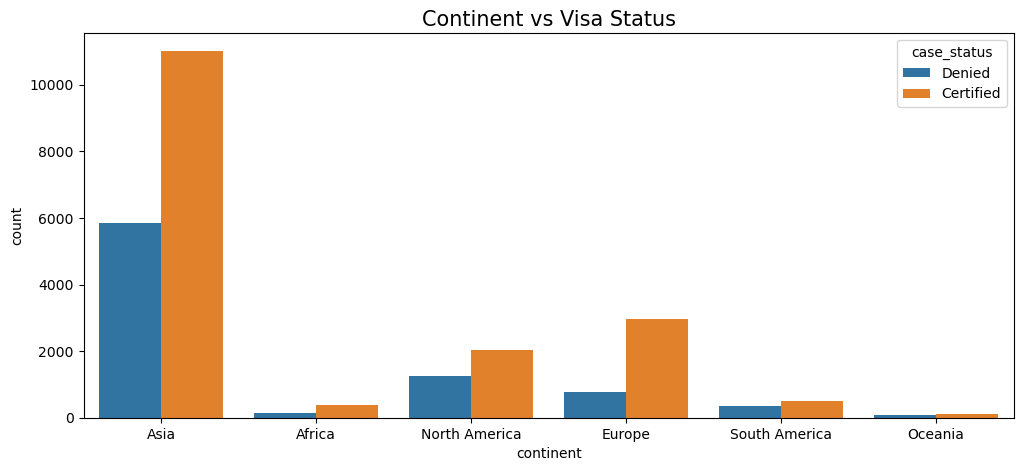

In [35]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="continent", hue="case_status", dodge=True)
plt.title("Continent vs Visa Status",fontsize=15, pad=5)
plt.show()

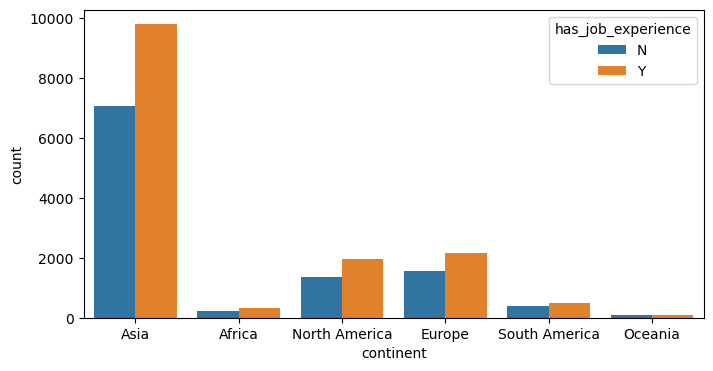

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="continent", hue="has_job_experience", dodge=True)
plt.show()

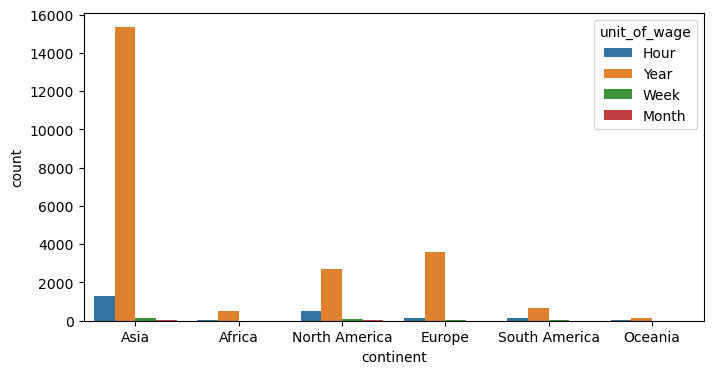

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="continent", hue="unit_of_wage", dodge=True)
plt.show()